In [121]:
import numpy as np

In [122]:
Tot_E= 9/14*np.log2(14/9) + 5/14*np.log2(14/5)
Tot_E

np.float64(0.9402859586706311)

In [123]:
np.log2(1)

np.float64(0.0)

In [124]:
Esunny= 2/5*np.log2(5/2) + 3/5*np.log2(5/3)
Esunny

np.float64(0.9709505944546687)

In [125]:
Eovercast=0

In [126]:
Erainy= 3/5*np.log2(5/3) + 2/5*np.log2(5/2)
Erainy

np.float64(0.9709505944546687)

In [127]:
Inf_Gain_outlook= Tot_E-((Esunny*(5/14))+(Eovercast*(4/14))+(Erainy*(5/14)))

In [128]:
Inf_Gain_outlook

np.float64(0.24674981977443922)

In [129]:
Total_GI= 1-(((9/14)**2)+((5/14)**2))
Total_GI

0.4591836734693877

In [130]:
GIsunny= 1-(((2/5)**2)+((3/5)**2))
GIsunny

0.48

In [131]:
GIrainy= 1-(((3/5)**2)+((2/5)**2))
GIrainy

0.48

In [132]:
GIovercast=0

In [133]:
InfG_outlook= Total_GI-(GIsunny*(5/14)+GIovercast*(4/14)+GIrainy*(5/14))

In [134]:
InfG_outlook

0.11632653061224485

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [143]:
df= pd.read_csv('sales.csv',index_col=[0])

In [144]:
df.shape

(400, 11)

In [146]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high
1,138,73,11,276,120,Bad,42,17,Yes,Yes,yes
2,111,48,16,260,83,Good,65,10,Yes,Yes,yes
3,113,35,10,269,80,Medium,59,12,Yes,Yes,yes
4,117,100,4,466,97,Medium,55,14,Yes,Yes,no
5,141,64,3,340,128,Bad,38,13,Yes,No,no


In [147]:
#### Missing values
df.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
high           0
dtype: int64

In [148]:
### duplicates
df.duplicated().sum()

np.int64(0)

In [151]:
target=df[['high']]
features= df.drop(columns=['high'])
features.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [152]:
ord_enc=OrdinalEncoder()
features[[ 'ShelveLoc','Urban', 'US']]= ord_enc.fit_transform(features[[ 'ShelveLoc','Urban', 'US']])
features.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,138,73,11,276,120,0.0,42,17,1.0,1.0
2,111,48,16,260,83,1.0,65,10,1.0,1.0
3,113,35,10,269,80,2.0,59,12,1.0,1.0
4,117,100,4,466,97,2.0,55,14,1.0,1.0
5,141,64,3,340,128,0.0,38,13,1.0,0.0


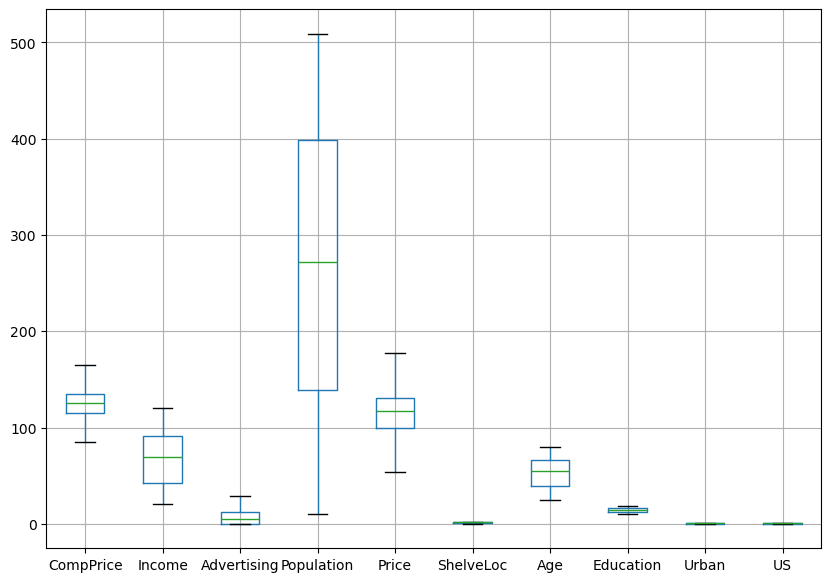

In [159]:
plt.figure(figsize=(10,7))
features.boxplot()
plt.show()

In [155]:
### outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in features.select_dtypes(['int','float']).columns:
    outlier_capping(features,col)

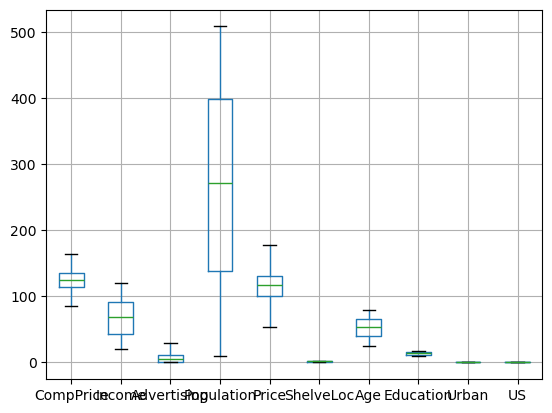

In [156]:
features.boxplot()
plt.show()

In [169]:
target.head()
target1=target.copy()
le= LabelEncoder()
target1=pd.DataFrame(le.fit_transform(target1),columns=target.columns)
target1.head()

,high
0,1
1,1
2,1
3,0
4,0


In [160]:
features.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,138.0,73,11,276,120.0,0.0,42,17,1.0,1.0
2,111.0,48,16,260,83.0,1.0,65,10,1.0,1.0
3,113.0,35,10,269,80.0,2.0,59,12,1.0,1.0
4,117.0,100,4,466,97.0,2.0,55,14,1.0,1.0
5,141.0,64,3,340,128.0,0.0,38,13,1.0,0.0


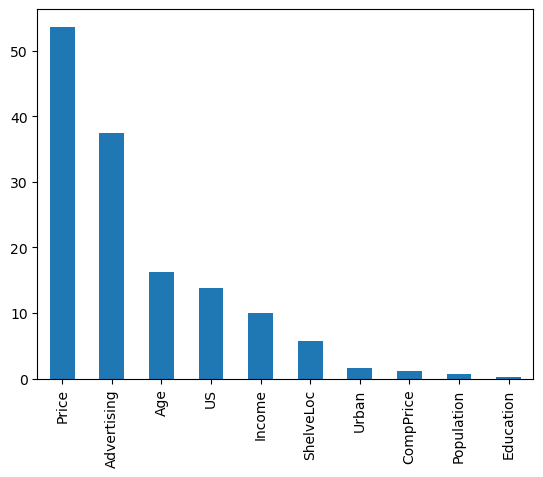

In [174]:
### feature selection
from sklearn.feature_selection import f_classif
f_class= f_classif(features,target1)
pd.Series(f_class[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [175]:
features.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [176]:
features.drop(columns=['Population','Education'],inplace=True)
features.head()

,CompPrice,Income,Advertising,Price,ShelveLoc,Age,Urban,US
1,138.0,73,11,120.0,0.0,42,1.0,1.0
2,111.0,48,16,83.0,1.0,65,1.0,1.0
3,113.0,35,10,80.0,2.0,59,1.0,1.0
4,117.0,100,4,97.0,2.0,55,1.0,1.0
5,141.0,64,3,128.0,0.0,38,1.0,0.0


In [191]:
x_train,x_test,y_train,y_test= train_test_split(features,target1,train_size=0.8,random_state=100,stratify=target1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 8)
(80, 8)
(320, 1)
(80, 1)


In [192]:
std=StandardScaler()
x_train[['CompPrice', 'Income', 'Advertising', 'Price','Age']]=std_sca.fit_transform(x_train[['CompPrice', 'Income', 'Advertising', 'Price','Age']])
x_test[['CompPrice', 'Income', 'Advertising', 'Price','Age']]= std_sca.transform(x_test[['CompPrice', 'Income', 'Advertising', 'Price','Age']])

In [193]:
x_train.columns

Index(['CompPrice', 'Income', 'Advertising', 'Price', 'ShelveLoc', 'Age',
       'Urban', 'US'],
      dtype='object')

In [199]:
#### Model Building
dec_tree= DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=5)
dec_tree.fit(x_train,y_train)
y_pred= dec_tree.predict(x_test)
accuracy_score(y_test,y_pred)

0.75

In [202]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':range(1,7)}

#### GridSearch

In [203]:
grid_search=GridSearchCV(estimator=dec_tree,param_grid=params,cv=5)

In [205]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, splitter='random'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 7),
                         'splitter': ['best', 'random']})

In [206]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 6, 'splitter': 'best'}

In [207]:
#### Model Building
dec_tree= DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=6)
dec_tree.fit(x_train,y_train)
y_pred= dec_tree.predict(x_test)
accuracy_score(y_test,y_pred)

0.7

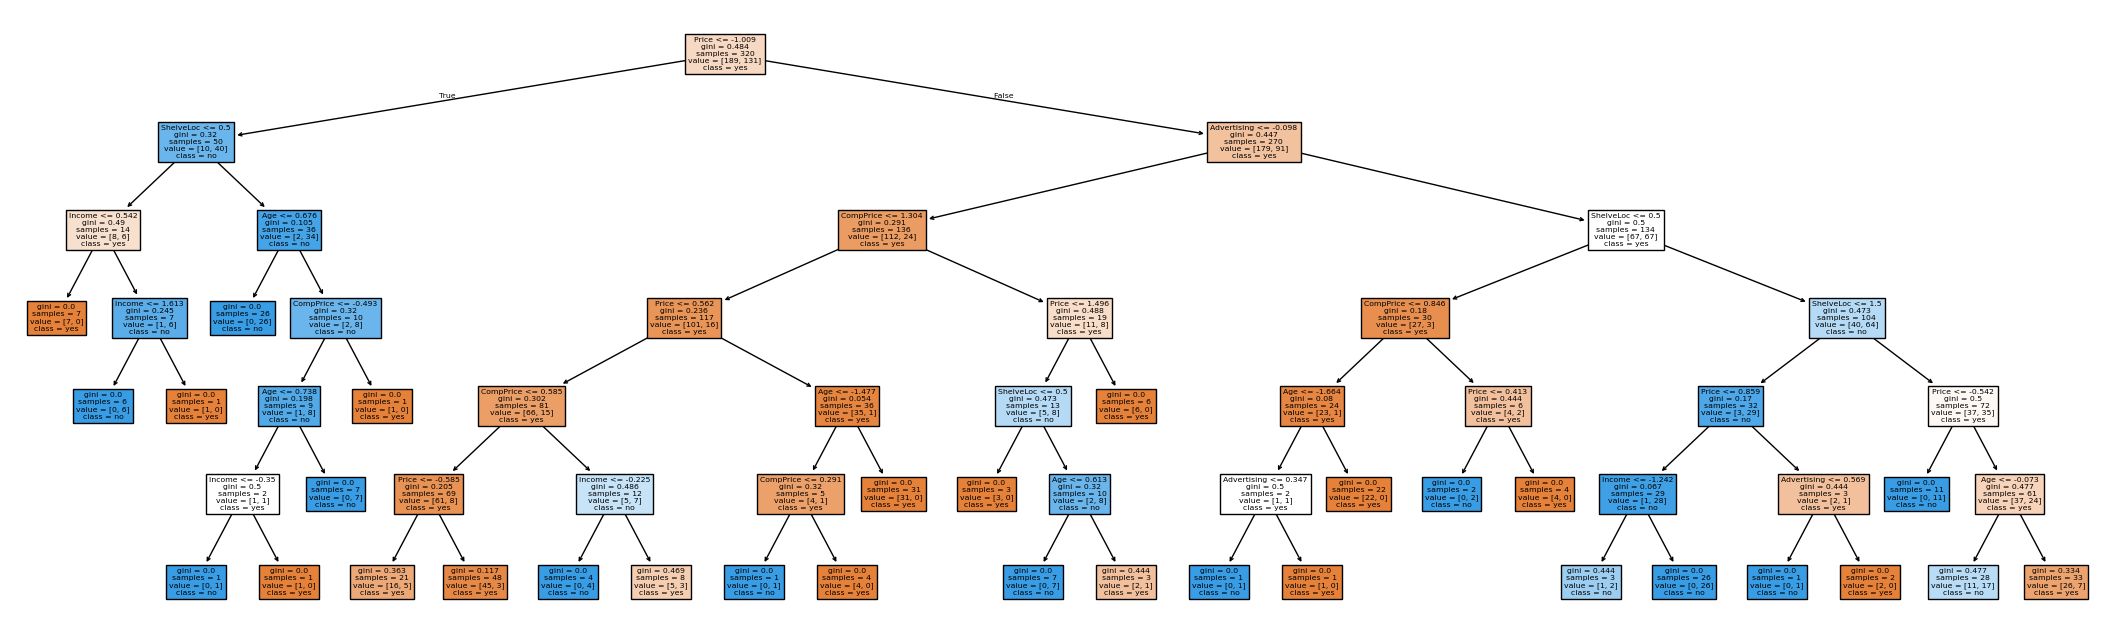

In [217]:
plt.figure(figsize=(27,8))
plot_tree(dec_tree,filled=True,feature_names=list(features),class_names=target.high.unique())
plt.show();